In [171]:
# импортируем необходимые библиотеки:
import pandas as pd
import category_encoders as ce
import requests
from bs4 import BeautifulSoup
import re
# для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# для нормализации, стандартизации
from sklearn import preprocessing
from scipy.stats import normaltest
# для отбора признаков
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.feature_selection import f_classif # anova
# для создания и обучения модели  
from sklearn.ensemble import RandomForestRegressor 
# для оценки точности модели
from sklearn import metrics 
# инструмент для разбивки
from sklearn.model_selection import train_test_split

In [172]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


**Знакомимся с данными**

In [173]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [174]:
hotels.describe(include='all')

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
count,386803,386803.000000,386803,386803.000000,386803,386803,386803,386803.000000,386803.000000,386803,386803.000000,386803.00000,386803.000000,386803,386803,384355.000000,384355.000000
unique,1493,NaN,731,NaN,1492,225,248828,NaN,NaN,311737,NaN,NaN,NaN,47135,731,NaN,NaN
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,NaN,NaN
freq,3587,NaN,1911,NaN,3587,184033,95907,NaN,NaN,26885,NaN,NaN,NaN,3853,1911,NaN,NaN
mean,NaN,498.246536,NaN,8.397231,NaN,NaN,NaN,18.538988,2743.992042,NaN,17.776985,7.17725,8.396906,NaN,NaN,49.443522,2.823402
std,NaN,500.258012,NaN,0.547881,NaN,NaN,NaN,29.703369,2316.457018,NaN,21.726141,11.05442,1.636090,NaN,NaN,3.466936,4.579043
min,NaN,1.000000,NaN,5.200000,NaN,NaN,NaN,0.000000,43.000000,NaN,0.000000,1.00000,2.500000,NaN,NaN,41.328376,-0.369758
25%,NaN,169.000000,NaN,8.100000,NaN,NaN,NaN,2.000000,1161.000000,NaN,5.000000,1.00000,7.500000,NaN,NaN,48.214662,-0.143649
50%,NaN,342.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2134.000000,NaN,11.000000,3.00000,8.800000,NaN,NaN,51.499981,-0.000250
75%,NaN,660.000000,NaN,8.800000,NaN,NaN,NaN,23.000000,3613.000000,NaN,22.000000,8.00000,9.600000,NaN,NaN,51.516288,4.834443


**Создаем новые признаки**

In [175]:
# Из адреса отеля создадим признак с тем, находится ли отель в городе-миллионере.
# Составляем список европейских городов-миллионеров.
# С соответствующей страницы Википедии выгружаем таблицу, содержащую наименования городов-миллионеров.
cities = []
url = 'https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits'
content = requests.get(url)
soup = BeautifulSoup(content.text, 'html.parser')
cities_table = soup.find('table', {'class':"wikitable"})

# Выбираем из таблицы данные о городах и наполняем ими соответствующий список.
data_rows = cities_table.find_all('tr')
for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    if len(beautified_value) == 0:
        continue
    cities.append(beautified_value[1])

# Пишем функцию, которая проверяет наличие в адрес указания на соответствующий город.
def find_city (adress):
    for c in cities:
        if c.lower() in adress.lower():
            return 1
    return 0

hotels['large_city'] = hotels['hotel_address'].apply(find_city)

In [176]:
# создаем признак, определяющий принадлежность отеля к сети отелей
large_hotel_chains = ['Ibis', 'Best Western', 'Holiday Inn', 'Mercure', 'Premier Inn',
                'Novotel', 'Hilton', 'NH', 'Travelodge', 'Four Seasons', 'Hyatt',
                'InterContinental', 'Kempinski', 'Lotte', 'Marriott', 'Ritz',
                'Millennium', 'Copthorne', 'Radisson', 'Wyndham', 'Accor', 'Whitbread',
                'Melia', 'Louvre', 'TUI', 'Carlson', 'Motel One'
                ]

def if_chain (hotel):
    for h in large_hotel_chains:
        if h.lower() in hotel.lower():
            return 1
    return 0

hotels['chain_hotel'] = hotels['hotel_name'].apply(if_chain)

In [177]:
# создаем новый признак с месяцем отзыва и кодируем его
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_month'] = hotels['review_date'].dt.month
bin_encoder = ce.BinaryEncoder(cols=['review_month'])
month_bin = bin_encoder.fit_transform(hotels['review_month'])
hotels = pd.concat([hotels, month_bin], axis=1)
hotels = hotels.drop(['review_month', 'review_date'], axis=1)

In [178]:
# создаем отдельные признаки из признака, содержащего теги
# признак с информацией о типе поездки
trip_reg = 'Leisure|Business'
hotels['trip_type'] = hotels['tags'].str.findall(trip_reg).str.get(0)
hotels['trip_type'] = hotels['trip_type'].fillna(hotels['trip_type'].mode()[0])

# признак с информацией о типе постояльца
traveler_reg = 'Couple|Solo traveler|Group|Family with young children|Family with older children|Travelers with friends'
hotels['traveler_type'] = hotels['tags'].str.findall(traveler_reg).str.get(0)

# признак с информацией о типе комнаты
room_reg = '[a-zA-Z\s]+Room|\d\srooms|[a-zA-Z\s]+Suite|[a-zA-Z\s]+Appartment'
hotels['room_type'] = hotels['tags'].str.findall(room_reg).str.get(0)
popular_room_types = hotels['room_type'].value_counts().nlargest(50)
hotels['room_type'] = hotels['room_type'].apply(lambda x: x if x in popular_room_types else 'other')
hotels['room_type'] = hotels['room_type'].fillna('other')

# признак с информацией о количестве ночей
nights_reg = 'Stayed\s([\d]*)'
hotels['nights_amount'] = hotels['tags'].str.findall(nights_reg).str.get(0)
hotels['nights_amount'] = hotels['nights_amount'].fillna(hotels['nights_amount'].mode()[0])
hotels['nights_amount'] =  hotels['nights_amount'].astype('int64')

# признак с информацией о способе бронирования
hotels['mobile_submission'] = hotels['tags'].str.findall('Submitted from a mobile device').str.get(0)

**Кодируем и преобразуем существующие признаки**

In [179]:
# кодируем столбец с названиями отелей
bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
name_bin = bin_encoder.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, name_bin], axis=1)
hotels = hotels.drop(['hotel_name'], axis=1)

In [180]:
# кодируем столбец со страной рецензента
# предварительно оставляем 50 популярных значений, остальное заменяем на other
popular_countries = hotels['reviewer_nationality'].value_counts().nlargest(50)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: x if x in popular_countries else 'other')
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
countries_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, countries_bin], axis=1)
hotels = hotels.drop(['reviewer_nationality'], axis=1)


In [181]:
# кодируем признаки негативные и позитивные образы
def negative_reviews(review):
    non_negative = ['no negative', ' nothing', ' none', ' na', ' n a', ' ']
    if review.lower() in non_negative:
        return 0
    return 1

def positive_reviews(review):
    non_positive = ['no positive', ' nothing', ' none', ' na', ' n a', ' ']
    if review.lower() in non_positive:
        return 0
    return 1

hotels['negative_review'] = hotels['negative_review'].apply(negative_reviews)
hotels['positive_review'] = hotels['positive_review'].apply(positive_reviews)

In [182]:
# кодируем признак с типом комнаты
bin_encoder = ce.BinaryEncoder(cols=['room_type'])
countries_bin = bin_encoder.fit_transform(hotels['room_type'])
hotels = pd.concat([hotels, countries_bin], axis=1)
hotels = hotels.drop(['room_type'], axis=1)

In [183]:
# кодируем признаки с типом поездки, постояльца и способа бронирования
hotels = pd.get_dummies(hotels, prefix=['trip', 'traveler', 'booking'],
                        columns=['trip_type', 'traveler_type','mobile_submission']
                        )

In [184]:
# преобразуем признак, показывающий разницу во времени между первым и последним отзывом
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: x.split()[0])
hotels['days_since_review'] = hotels['days_since_review'].astype('int64')

In [185]:
# удаляем оставшиеся нечисловые признаки
hotels = hotels.drop(['hotel_address', 'tags'], axis = 1)

In [186]:
# заполняем пустые значения модой в признаках долготы и широты
hotels['lng'] = hotels['lng'].fillna(hotels['lng'].mode()[0])
hotels['lat'] = hotels['lat'].fillna(hotels['lat'].mode()[0])

**Нормализуем и стандартизируем признаки**

In [187]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 51 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   negative_review                             386803 non-null  int64  
 3   review_total_negative_word_counts           386803 non-null  int64  
 4   total_number_of_reviews                     386803 non-null  int64  
 5   positive_review                             386803 non-null  int64  
 6   review_total_positive_word_counts           386803 non-null  int64  
 7   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 8   reviewer_score                              386803 non-null  float64
 9   days_since_review                           386803 non-null  int64  
 

In [188]:
hotels.describe()

,additional_number_of_scoring,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,...,room_type_5,trip_Business,trip_Leisure,traveler_Couple,traveler_Family with older children,traveler_Family with young children,traveler_Group,traveler_Solo traveler,traveler_Travelers with friends,booking_Submitted from a mobile device
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,386803.000000,...,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000
mean,498.246536,8.397231,0.711683,18.538988,2743.992042,0.927097,17.776985,7.17725,8.396906,354.387978,...,0.505689,0.160306,0.839694,0.489169,0.051194,0.118500,0.126907,0.210016,0.004214,0.596629
std,500.258012,0.547881,0.452980,29.703369,2316.457018,0.259977,21.726141,11.05442,1.636090,208.975174,...,0.499968,0.366890,0.366890,0.499883,0.220394,0.323199,0.332869,0.407320,0.064779,0.490575
min,1.000000,5.200000,0.000000,0.000000,43.000000,0.000000,0.000000,1.00000,2.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.000000,8.100000,0.000000,2.000000,1161.000000,1.000000,5.000000,1.00000,7.500000,175.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,342.000000,8.400000,1.000000,9.000000,2134.000000,1.000000,11.000000,3.00000,8.800000,353.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,660.000000,8.800000,1.000000,23.000000,3613.000000,1.000000,22.000000,8.00000,9.600000,527.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2682.000000,9.800000,1.000000,408.000000,16670.000000,1.000000,395.000000,355.00000,10.000000,730.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


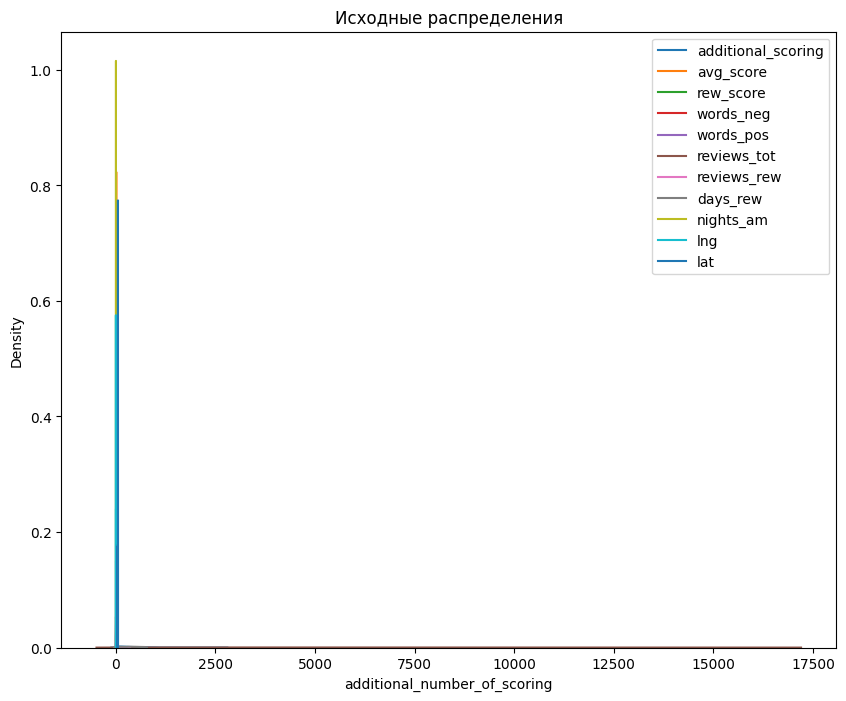

In [189]:
# посмотрим, как выглядят нащи данные до их обработки, 
# создав графики распределений для непрерывных признаков:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# создадим графики распределений для числовых признаков
sns.kdeplot(hotels['additional_number_of_scoring'], ax=ax1, label ='additional_scoring')
sns.kdeplot(hotels['average_score'], ax=ax1, label ='avg_score')
sns.kdeplot(hotels['reviewer_score'], ax=ax1, label ='rew_score')
sns.kdeplot(hotels['review_total_negative_word_counts'], ax=ax1, label ='words_neg')
sns.kdeplot(hotels['review_total_positive_word_counts'], ax=ax1, label ='words_pos')
sns.kdeplot(hotels['total_number_of_reviews'], ax=ax1, label ='reviews_tot')
sns.kdeplot(hotels['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='reviews_rew')
sns.kdeplot(hotels['days_since_review'], ax=ax1, label ='days_rew')
sns.kdeplot(hotels['nights_amount'], ax=ax1, label ='nights_am')
sns.kdeplot(hotels['lng'], ax=ax1, label ='lng')
sns.kdeplot(hotels['lat'], ax=ax1, label ='lat')
plt.legend()

# на графике видно большое количество выбросов для отдельных признаков

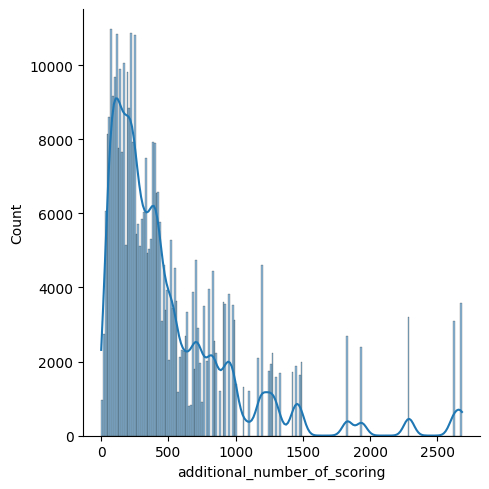

In [190]:
# строим график для анализа признака additional_number_of_scoring
# из графика видно, что признак распределен ненормально и имеются выбросы
# используем RobustScaler для нормализации признака
sns.displot(hotels['additional_number_of_scoring'], kde=True)

r_scaler = preprocessing.RobustScaler()
hotels['additional_number_of_scoring'] = pd.DataFrame(r_scaler.fit_transform(hotels[['additional_number_of_scoring']]))

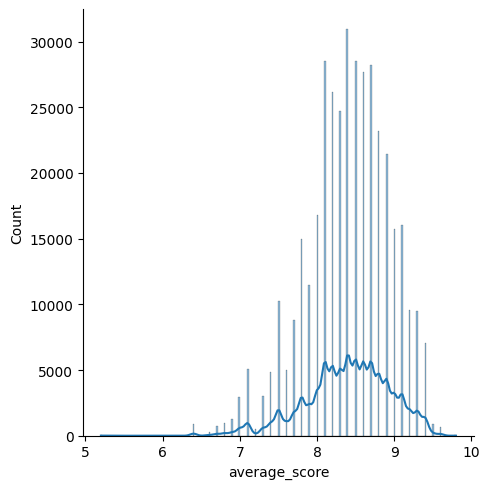

In [191]:
# строим график для анализа признака average_score
# проверим себя с помощью статистического теста
sns.displot(hotels['average_score'], kde=True)

In [192]:
# проводим тест Д'Агостино для анализа распределения
# видим, что действительно признак распределн ненормально
alpha = 0.05

_, p = normaltest(hotels[['average_score']])
print('p=%.3f' % p[0])

if p[0] > alpha:
	print('Данные распределены нормально')
else:
	print('Данные не распределены нормально')
 
# используем метод MinMaxScaler для нормализации признака
mm_scaler = preprocessing.MinMaxScaler()
hotels['average_score'] = pd.DataFrame(mm_scaler.fit_transform(hotels[['average_score']]))

p=0.000
Данные не распределены нормально


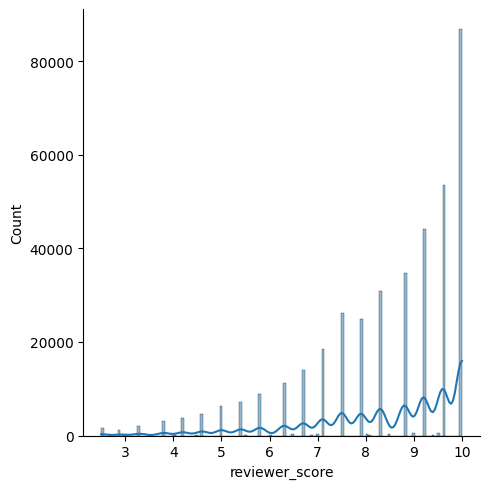

In [193]:
# строим график для анализа признака reviewer_score
# из графика видно, что признак распределен ненормально
# используем MinMaxScaler для нормализации признака
sns.displot(hotels['reviewer_score'], kde=True)

hotels['reviewer_score'] = pd.DataFrame(mm_scaler.fit_transform(hotels[['reviewer_score']]))

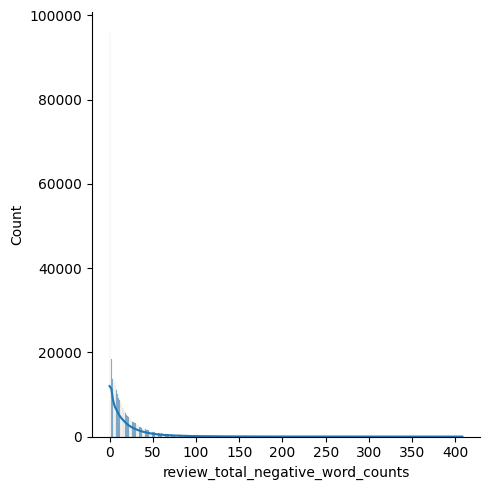

In [194]:
# строим график для анализа признака review_total_negative_word_counts
# из графика видно, что признак распределен ненормально и имеются выбросы
# используем RobustScaler для нормализации признака
sns.displot(hotels['review_total_negative_word_counts'], kde=True)

hotels['review_total_negative_word_counts'] = pd.DataFrame(r_scaler.fit_transform(hotels[['review_total_negative_word_counts']]))

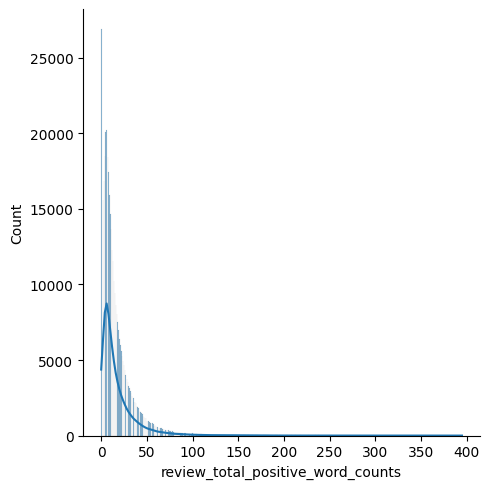

In [195]:
# строим график для анализа признака review_total_positive_word_counts
# из графика видно, что признак распределен ненормально и имеются выбросы
# используем RobustScaler для нормализации признака
sns.displot(hotels['review_total_positive_word_counts'], kde=True)

hotels['review_total_positive_word_counts'] = pd.DataFrame(r_scaler.fit_transform(hotels[['review_total_positive_word_counts']]))

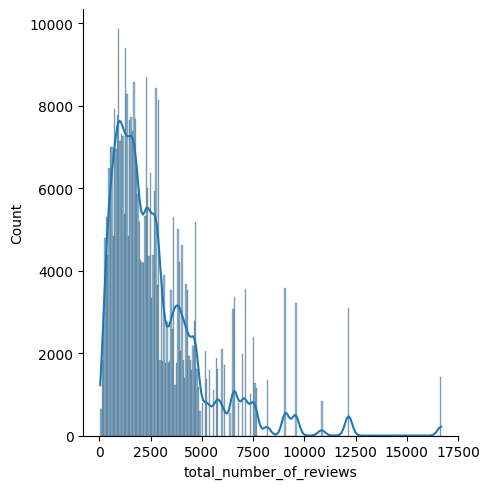

In [196]:
# строим график для анализа признака total_number_of_reviews
# из графика видно, что признак распределен ненормально и имеются выбросы
# используем RobustScaler для нормализации признака
sns.displot(hotels['total_number_of_reviews'], kde=True)

hotels['total_number_of_reviews'] = pd.DataFrame(r_scaler.fit_transform(hotels[['total_number_of_reviews']]))

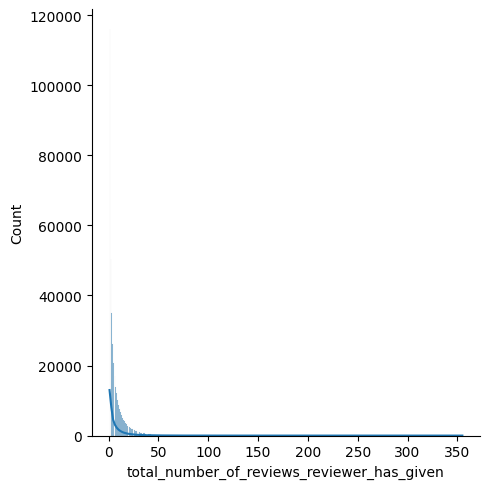

In [197]:
# строим график для анализа признака total_number_of_reviews_reviewer_has_given
# из графика видно, что признак распределен ненормально и имеются выбросы
# используем RobustScaler для нормализации признака
sns.displot(hotels['total_number_of_reviews_reviewer_has_given'], kde=True)

hotels['total_number_of_reviews_reviewer_has_given'] = pd.DataFrame(r_scaler.fit_transform(
    hotels[['total_number_of_reviews_reviewer_has_given']]
    ))

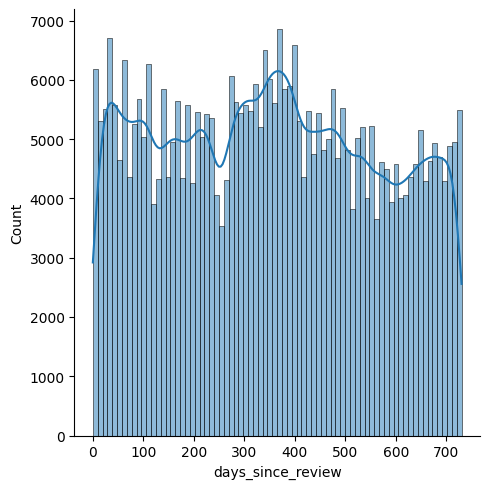

In [198]:
# строим график для анализа признака days_since_review
# из графика видно, что признак распределен ненормально
# используем MinMaxScaler для нормализации признака
sns.displot(hotels['days_since_review'], kde=True)

hotels['days_since_review'] = pd.DataFrame(mm_scaler.fit_transform(hotels[['days_since_review']]))

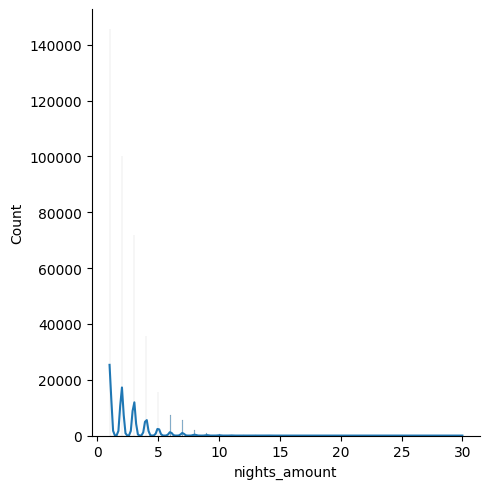

In [199]:
# строим график для анализа признака days_since_review
# из графика видно, что признак распределен ненормально и имеются выбросы
# используем RobustScaler для нормализации признака
sns.displot(hotels['nights_amount'], kde=True)

hotels['nights_amount'] = pd.DataFrame(r_scaler.fit_transform(hotels[['nights_amount']]))

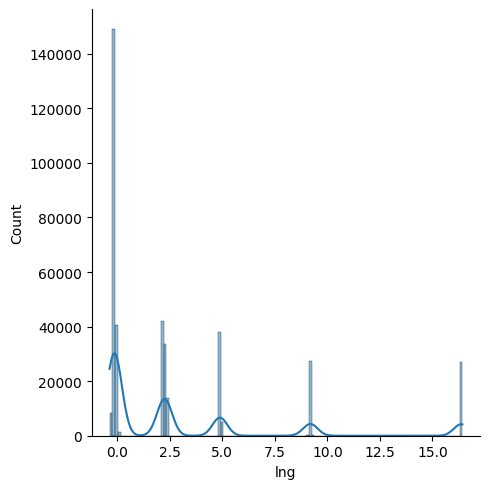

In [200]:
# строим график для анализа признака lng
# из графика видно, что признак распределен ненормально
# используем MinMaxScaler для нормализации признака
sns.displot(hotels['lng'], kde=True)

hotels['lng'] = pd.DataFrame(mm_scaler.fit_transform(hotels[['lng']]))

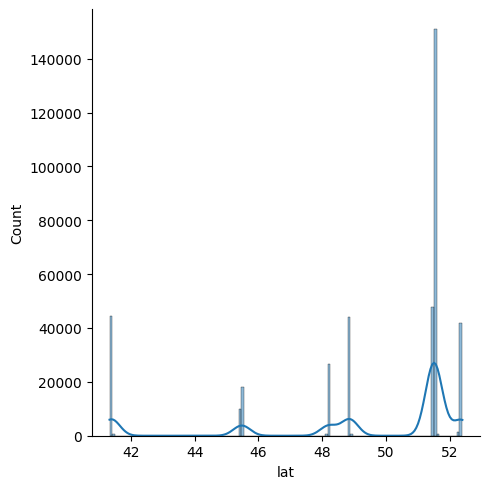

In [201]:
# строим график для анализа признака lng
# из графика видно, что признак распределен ненормально
# используем MinMaxScaler для нормализации признака
sns.displot(hotels['lat'], kde=True)

hotels['lat'] = pd.DataFrame(mm_scaler.fit_transform(hotels[['lat']]))

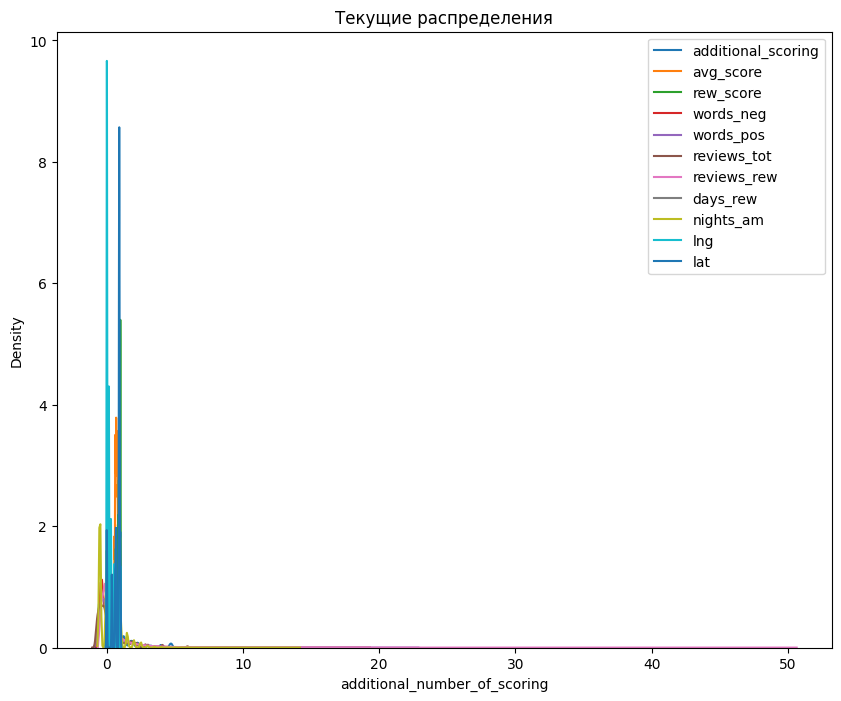

In [202]:
# зададим параметры холста, название и визуализируем кривые распределения после нормализации данных:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Текущие распределения')

# создадим графики распределений для числовых признаков
sns.kdeplot(hotels['additional_number_of_scoring'], ax=ax1, label ='additional_scoring')
sns.kdeplot(hotels['average_score'], ax=ax1, label ='avg_score')
sns.kdeplot(hotels['reviewer_score'], ax=ax1, label ='rew_score')
sns.kdeplot(hotels['review_total_negative_word_counts'], ax=ax1, label ='words_neg')
sns.kdeplot(hotels['review_total_positive_word_counts'], ax=ax1, label ='words_pos')
sns.kdeplot(hotels['total_number_of_reviews'], ax=ax1, label ='reviews_tot')
sns.kdeplot(hotels['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='reviews_rew')
sns.kdeplot(hotels['days_since_review'], ax=ax1, label ='days_rew')
sns.kdeplot(hotels['nights_amount'], ax=ax1, label ='nights_am')
sns.kdeplot(hotels['lng'], ax=ax1, label ='lng')
sns.kdeplot(hotels['lat'], ax=ax1, label ='lat')
plt.legend()

# распределение признаков немного улучшилось по отношению к первоначальному


**Отбираем полученные признаки**

<AxesSubplot: >

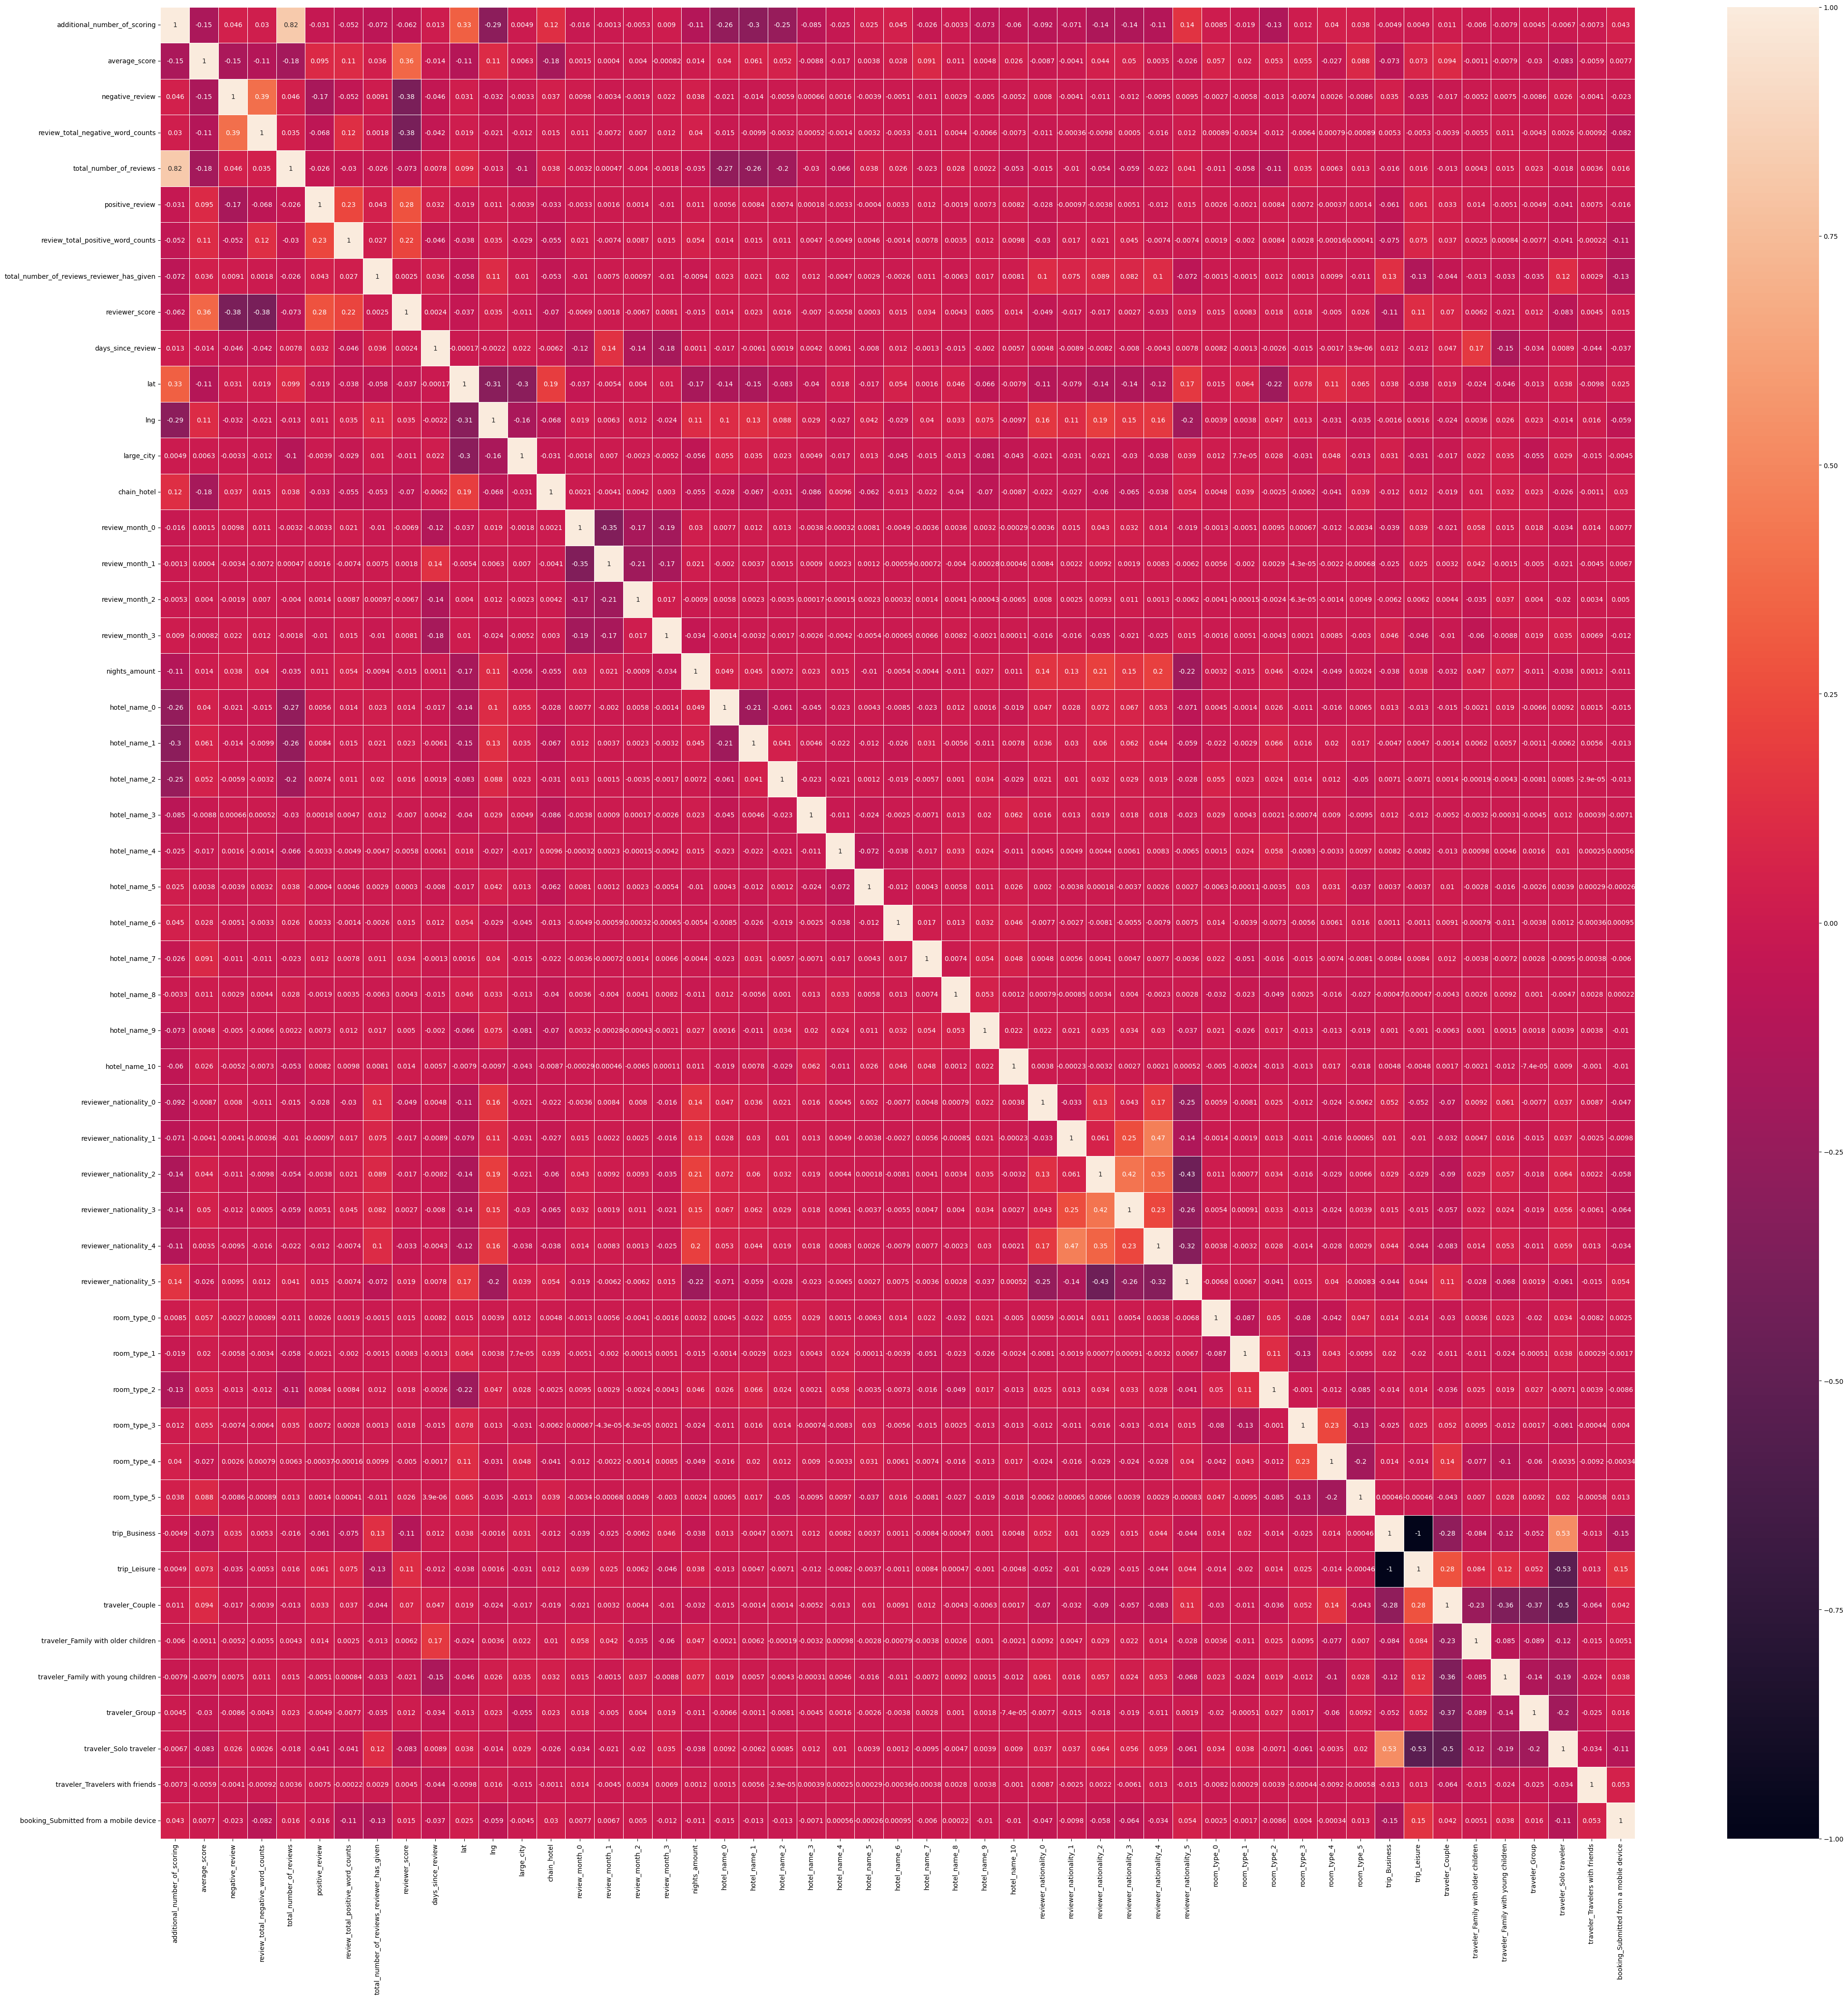

In [203]:
# создаем матрицу корреляция для полученных признаков
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(hotels.corr(), annot = True, linewidths=.5, ax=ax)

In [204]:
# удаляем признаки с очень сильной корреляцией
hotels = hotels.drop(['additional_number_of_scoring', "trip_Business"], axis = 1)


In [205]:
# непрерывные признаки
num_cols = ['review_total_negative_word_counts','total_number_of_reviews',
            'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given',
            'days_since_review', 'nights_amount'
            ]


# категориальные признаки
cat_cols = ['average_score','negative_review', 'positive_review', 
            'large_city', 'chain_hotel', 'review_month_0', 'review_month_1',
            'review_month_2', 'review_month_3', 'hotel_name_0', 'hotel_name_1',
            'hotel_name_2', 'hotel_name_3', 'hotel_name_4', 'hotel_name_5',
            'hotel_name_6', 'hotel_name_7', 'hotel_name_8', 'hotel_name_9',
            'hotel_name_10', 'reviewer_nationality_0', 'reviewer_nationality_1',
            'reviewer_nationality_2', 'reviewer_nationality_3', 'reviewer_nationality_4',
            'reviewer_nationality_5', 'room_type_0', 'room_type_1', 'room_type_2',
            'room_type_3', 'room_type_4', 'room_type_5', 'trip_Leisure',
            'traveler_Couple', 'traveler_Family with older children',
            'traveler_Family with young children', 'traveler_Group',
           'traveler_Solo traveler', 'traveler_Travelers with friends',
            'booking_Submitted from a mobile device', 'lat', 'lng'
            ]

<AxesSubplot: >

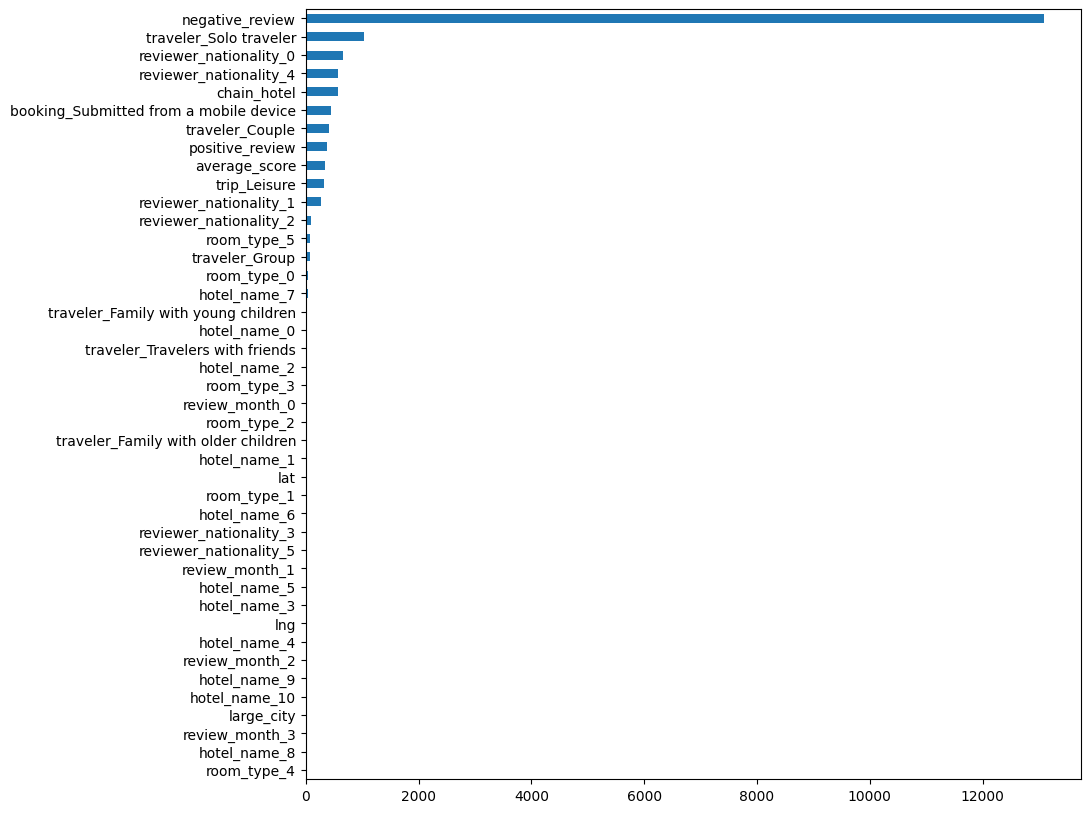

In [206]:
imp_cat = pd.Series(chi2(hotels[cat_cols], hotels['reviewer_score'].astype('int'))[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', figsize=(10, 10))

<AxesSubplot: >

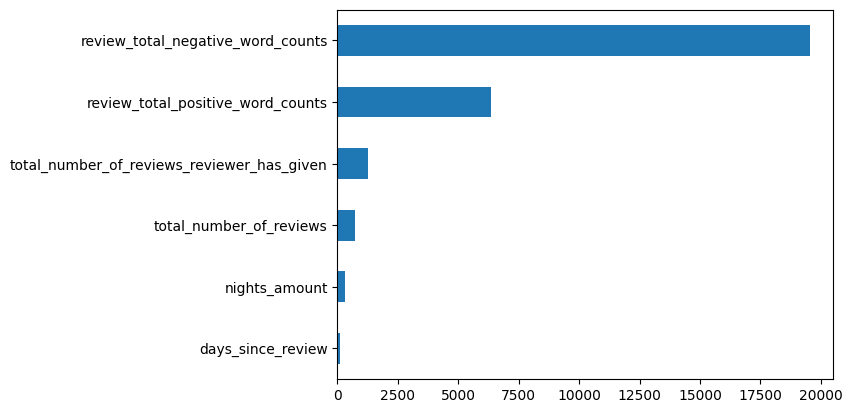

In [207]:
imp_num = pd.Series(f_classif(hotels[num_cols], hotels['reviewer_score'].astype('int'))[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [208]:
hotels = hotels.drop(['nights_amount', 'positive_review', 
            'large_city', 'chain_hotel', 'review_month_0', 'review_month_1',
            'review_month_2', 'review_month_3', 'hotel_name_0', 'hotel_name_1',
            'hotel_name_2', 'hotel_name_3', 'hotel_name_4', 'hotel_name_5',
            'hotel_name_6', 'hotel_name_7', 'hotel_name_8', 'hotel_name_9',
            'hotel_name_10', 'reviewer_nationality_0', 'reviewer_nationality_1',
            'reviewer_nationality_2', 'reviewer_nationality_3', 'reviewer_nationality_4',
            'reviewer_nationality_5', 'room_type_0', 'room_type_1', 'room_type_2',
            'room_type_3', 'room_type_4', 'room_type_5', 'trip_Leisure',
            'traveler_Couple', 'traveler_Family with older children',
            'traveler_Family with young children', 'traveler_Group',
           'traveler_Solo traveler', 'traveler_Travelers with friends',
            'booking_Submitted from a mobile device', 'lat', 'lng'], axis = 1)

In [ ]:
#hotels = hotels.drop(['review_total_negative_word_counts','total_number_of_reviews',
#            'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given',
#            'days_since_review', 'nights_amount', 'negative_review', 'positive_review', 
#            'large_city', 'chain_hotel', 'review_month_0', 'review_month_1',
#            'review_month_2', 'review_month_3', 'hotel_name_0', 'hotel_name_1',
#            'hotel_name_2', 'hotel_name_3', 'hotel_name_4', 'hotel_name_5',
#            'hotel_name_6', 'hotel_name_7', 'hotel_name_8', 'hotel_name_9',
#            'hotel_name_10', 'reviewer_nationality_0', 'reviewer_nationality_1',
#            'reviewer_nationality_2', 'reviewer_nationality_3', 'reviewer_nationality_4',
#            'reviewer_nationality_5', 'room_type_0', 'room_type_1', 'room_type_2',
#            'room_type_3', 'room_type_4', 'room_type_5', 'trip_Leisure',
#            'traveler_Couple', 'traveler_Family with older children',
#            'traveler_Family with young children', 'traveler_Group',
#           'traveler_Solo traveler', 'traveler_Travelers with friends',
#            'booking_Submitted from a mobile device', 'lat', 'lng'], axis = 1)

**Обучаем модель на полученных данных**

In [209]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']

In [210]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [211]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [212]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 10632359596547.1
